In [11]:
import json
import os

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import matplotlib.pyplot as plt

def analyze_filings(file_path):
    # load the JSON data from the file
    section_lengths = {}

    with open(file_path, 'r') as file:
        data = json.load(file)

    # iterate over each year in the data
    for year, contents in data.items():
        print(f"Year: {year}")
        for item, text in contents.items():
            if text != "Section not found" and text != "Failed to extract":
                length = len(text)
                print(f"  {item}: Length = {len(text)} characters, Preview = {text[:3]}")
                section_lengths[item] = section_lengths.get(item, []) + [length]
            else:
                print(f"  {item}: {text}")

    # plotting
    fig, ax = plt.subplots()
    for section, lengths in section_lengths.items():
        ax.plot(lengths, label=section)
    ax.set_xlabel('Year Index')
    ax.set_ylabel('Length of Section')
    ax.set_title('Section Lengths Over Years')
    ax.legend()
    plt.show()

    return section_lengths




In [ ]:
directory = "/content/drive/My Drive/sec_filings"

# file names
files = [
    "aapl1995-2005.json",
    "aapl2006-2023.json",
    "msft1995-2005.json",
    "msft2006-2023.json"
]

# analyze each file
for file_name in files:
    file_path = os.path.join(directory, file_name)
    print(f"Analyzing {file_name}...")
    print(file_path)
    analyze_filings(file_path)
    print("\n" + "-"*60 + "\n")


In [ ]:
# import json
# import os

def merge_json_files(directory, file_list, output_filename):
    combined_data = {}

    # iterate through each file in the list
    for filename in file_list:
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            # merge data
            combined_data.update(data)

    # write combined data to a new file
    output_path = os.path.join(directory, output_filename)
    with open(output_path, 'w') as file:
        json.dump(combined_data, file, indent=4)
    print(f"Data combined and saved to {output_path}")

# directory where the JSON files are stored
directory = "/content/drive/My Drive/sec_filings"

# combine Apple's JSON files
aapl_files = ['aapl1995-2005.json', 'aapl2006-2023.json']
merge_json_files(directory, aapl_files, 'combined_aapl.json')

# combine Microsoft's JSON files
msft_files = ['msft1995-2005.json', 'msft2006-2023.json']
merge_json_files(directory, msft_files, 'combined_msft.json')


Data combined and saved to /content/drive/My Drive/sec_filings/combined_aapl.json
Data combined and saved to /content/drive/My Drive/sec_filings/combined_msft.json


Analyzing combined_aapl.json...
Year: 1995
  item1: Length = 25515 characters, Preview = Ite
  item1A: Section not found
  item7: Length = 46060 characters, Preview = Ite
Year: 1996
  item1: Length = 24004 characters, Preview = Ite
  item1A: Section not found
  item7: Length = 55544 characters, Preview = Ite
Year: 1997
  item1: Length = 22276 characters, Preview = ITE
  item1A: Section not found
  item7: Length = 82066 characters, Preview = ITE
Year: 1999
  item1: Length = 24047 characters, Preview = ITE
  item1A: Section not found
  item7: Length = 74819 characters, Preview = ITE
Year: 2000
  item1: Length = 26569 characters, Preview = ITE
  item1A: Section not found
  item7: Length = 67297 characters, Preview = ITE
Year: 2002
  item1: Length = 54101 characters, Preview =  It
  item1A: Section not found
  item7: Length = 109714 characters, Preview =  It
Year: 2003
  item1: Length = 18 characters, Preview =  It
  item1A: Section not found
  item7: Length = 95 characters, Preview =  It


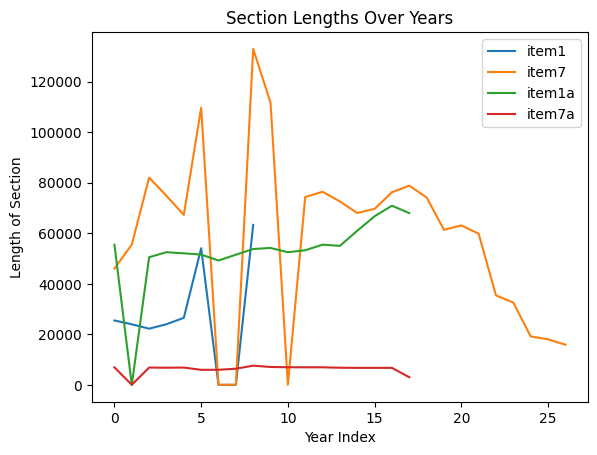


------------------------------------------------------------

Analyzing combined_msft.json...
Year: 1995
  item1: Length = 41901 characters, Preview = ITE
  item1A: Section not found
  item7: Length = 17945 characters, Preview = ITE
Year: 1996
  item1: Length = 44362 characters, Preview = Ite
  item1A: Section not found
  item7: Length = 265 characters, Preview = Ite
Year: 1997
  item1: Length = 46294 characters, Preview = Ite
  item1A: Section not found
  item7: Length = 254 characters, Preview = Ite
Year: 1998
  item1: Length = 50942 characters, Preview = ITE
  item1A: Section not found
  item7: Length = 257 characters, Preview = ITE
Year: 1999
  item1: Length = 54108 characters, Preview = Ite
  item1A: Section not found
  item7: Length = 261 characters, Preview = Ite
Year: 2000
  item1: Length = 56770 characters, Preview = Ite
  item1A: Section not found
  item7: Length = 255 characters, Preview = Ite
Year: 2001
  item1: Length = 52678 characters, Preview = Ite
  item1A: Section no

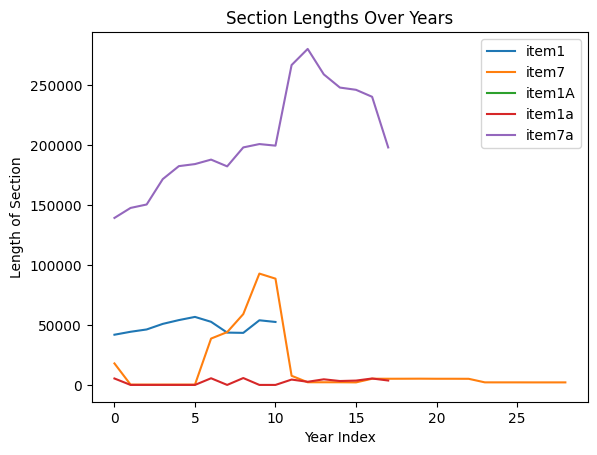


------------------------------------------------------------



In [13]:
directory = "/content/drive/My Drive/sec_filings"

# combined JSON files
combined_files = [
    "combined_aapl.json",
    "combined_msft.json"
]

# analyze each combined file
for file_name in combined_files:
    file_path = os.path.join(directory, file_name)
    print(f"Analyzing {file_name}...")
    analyze_filings(file_path)
    print("\n" + "-"*60 + "\n")

In [ ]:
!pip install openai

!pip install tenacity


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00


In [22]:
import json
import os
from openai import OpenAI, APIError, RateLimitError

from tenacity import (
    retry,
    stop_after_attempt,
    wait_random_exponential,
)  # for exponential backoff

client = OpenAI(api_key='sk-proj-LyIHdn12hAZSfRDzzd6iT3BlbkFJZKLzPB5yoJLKYWOGXOXw')

# @retry(wait=wait_random_exponential(multiplier=1, max=60), stop=stop_after_attempt(5))
@retry(wait=wait_random_exponential(min=1, max=60), stop=stop_after_attempt(6))
def summarize_section(client, company, year, section_name, text):
    section_purposes = {
        'item1': "Business - a description of the company's operation",
        'item1A': "Risk Factors",
        'item7': "Management's Discussion and Analysis of the Financial Condition"
    }

    # setting up the conversation
    messages = [
        {"role": "system", "content": f"You are a helpful assistant trained to summarize corporate filings. Please summarize the content for {company} in the year {year}."},
        {"role": "user", "content": f"Can you summarize (in around 200 words or so) {section_name} which covers {section_purposes[section_name]}?\n\n{text}"}
    ]

    try:
        completion = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=messages
        )
        return completion.choices[0].message.content  # Make sure to handle potential exceptions or errors
    except RateLimitError:
        print("Rate limit exceeded, will retry later.")
        return "No response generated due to rate limit."
    except APIError as e:
        print(f"API Error: {str(e)}")
        return "No response generated due to API error."
    except Exception as e:
        print(f"Unexpected error: {str(e)}")
        return "No response generated due to an unexpected error."




In [34]:
def process_and_summarize_filings(file_path, company_name):
    with open(file_path, 'r') as file:
        data = json.load(file)

    summaries = {}
    for year, contents in data.items():
        summaries[year] = {}
        for item in ['item1', 'item1A', 'item7']:
            if item in contents and contents[item] != "Section not found":
                summary = summarize_section(client, company_name, year, item, contents[item][:40000])
                print(summary)
                summaries[year][item] = summary
            else:
                summaries[year][item] = "No data available"
    return summaries

In [35]:
def save_summaries(directory, summaries, company_name):
    output_path = os.path.join(directory, f"summaries_{company_name}.json")
    with open(output_path, 'w') as file:
        json.dump(summaries, file, indent=4)
    print(f"Summaries saved to {output_path}")


In [36]:
directory = "/content/drive/My Drive/sec_filings"
companies = {"AAPL": "combined_aapl.json", "MSFT": "combined_msft.json"}

for company, filename in companies.items():
    file_path = os.path.join(directory, filename)
    print(f"Processing {filename} for {company}...")
    summaries = process_and_summarize_filings(file_path, company)
    save_summaries(directory, summaries, company)


Processing combined_aapl.json for AAPL...
In 1995, Apple Computer, Inc. focused on designing, manufacturing, and marketing microprocessor-based personal computers and related products for business, education, home, and government customers. The company underwent a major product transition to Power Macintosh computers based on the PowerPC architecture, a joint development with IBM and Motorola, to improve price/performance and functionality.

Apple announced the licensing of its Macintosh operating system to other personal computer vendors to increase market share and software innovation for the Macintosh platform. The company also offered a range of personal computing products including the Power Macintosh, Macintosh LC, Macintosh Performa, and Macintosh PowerBook families.

Additionally, Apple sold computer peripherals, networking and connectivity products, and personal digital assistant products like the MessagePad 120. The company's operating system software, Mac OS, along with appl

In [37]:
import json

def load_data(filepath):
    """Load JSON data from a file."""
    with open(filepath, 'r') as file:
        data = json.load(file)
    return data


In [38]:
def analyze_data(data, company_name):
    """Analyze the loaded JSON data to identify unsuccessful entries."""
    errors = {}
    for year, sections in data.items():
        for section, content in sections.items():
            if content == "No response generated" or "error" in content.lower():
                if year not in errors:
                    errors[year] = {}
                content = 'No response generated due to item section exceeding token window.'
                errors[year][section] = content
    if errors:
        print(f"Unsuccessful generations for {company_name}:")
        for year, sections in errors.items():
            print(f"  Year: {year}")
            for section, error in sections.items():
                print(f"    {section}: {error}")
    else:
        print(f"All sections successfully generated for {company_name}.")


In [39]:
def main():
    directory = "/content/drive/My Drive/sec_filings"  # update this to your actual directory
    aapl_data = load_data(f"{directory}/summaries_AAPL.json")
    msft_data = load_data(f"{directory}/summaries_MSFT.json")

    analyze_data(aapl_data, "AAPL")
    analyze_data(msft_data, "MSFT")

main()


All sections successfully generated for AAPL.
All sections successfully generated for MSFT.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Analyzing combined_aapl.json...


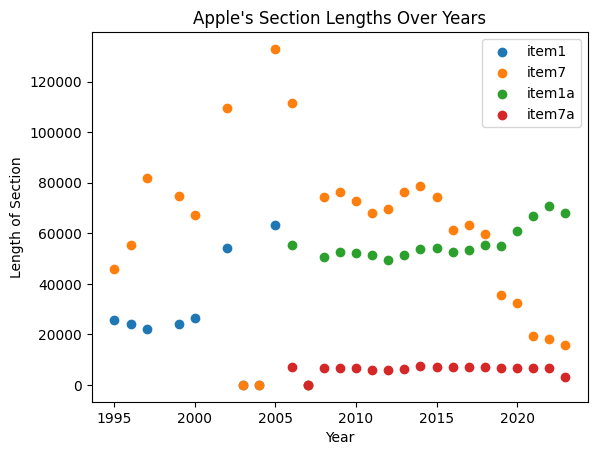

Plot saved as Apple_section_lengths_over_years.png

------------------------------------------------------------

Analyzing combined_msft.json...


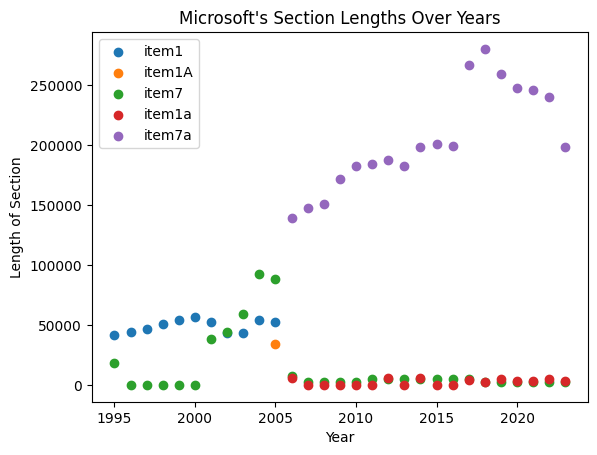

Plot saved as Microsoft_section_lengths_over_years.png

------------------------------------------------------------



In [21]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

def analyze_filings(file_path, company_name):
    # load the JSON data from the file
    with open(file_path, 'r') as file:
        data = json.load(file)

    # dictionary to store data for visualization
    section_lengths = {}

    # prepare data storage for each section
    for contents in data.values():
        for item in contents.keys():
            if item not in section_lengths:
                section_lengths[item] = []

    # iterate over each year in the data
    for year, contents in data.items():
        for item, text in contents.items():
            if text != "Section not found" and text != "Failed to extract":
                length = len(text)
                section_lengths[item].append((int(year), length))  # append (year, length) tuple

    # plotting
    fig, ax = plt.subplots()
    for section, data_points in section_lengths.items():
        if data_points:  # check if there are data points to plot
            years, lengths = zip(*data_points)  # unzip years and lengths
            ax.scatter(years, lengths, label=section)  # plot as scatter points

    ax.set_xlabel('Year')
    ax.set_ylabel('Length of Section')
    ax.set_title(f"{company_name}'s Section Lengths Over Years")  # custom title based on company
    ax.legend()

    # save the figure
    output_filename = f"{company_name}_section_lengths_over_years.png"
    plt.savefig(output_filename)
    plt.show()

    return section_lengths, output_filename  # return the filename for reference

directory = "/content/drive/My Drive/sec_filings"

# combined JSON files
combined_files = [
    "combined_aapl.json",
    "combined_msft.json"
]

# analyze each combined file
for file_name in combined_files:
    file_path = os.path.join(directory, file_name)
    company_name = 'Apple' if 'aapl' in file_name else 'Microsoft'  # determine company name from file
    print(f"Analyzing {file_name}...")
    section_lengths, saved_file = analyze_filings(file_path, company_name)
    print(f"Plot saved as {saved_file}")
    print("\n" + "-"*60 + "\n")
